In [35]:
import sys, os, base64
import requests, json, pymupdf4llm

def execute_text_prompt(prompt, API_KEY = os.getenv("AZURE_OPENAI_API_KEY"), ENDPOINT = os.getenv("AZURE_OPENAI_ENDPOINT"), is_json_response = None, pdf_binary = None):
    headers = {"Content-Type": "application/json","api-key": API_KEY}
    payload = {"messages" : [{ "role": "user","content": [{"type": "text","text": prompt}]}]}
    # add pdf
    if pdf_binary: payload["messages"].append({"role": "user","content": [{"type": "file_url","file_url": {"url": f"data:application/pdf;base64,{pdf_binary}"}}]})
    data = None
    if pdf_binary: data = {"base64Source": pdf_binary}
    try:
        if pdf_binary and False:
            response = requests.post(ENDPOINT, headers=headers, json=payload, data = json.dumps(pdf_binary))
        else:
            response = requests.post(ENDPOINT, headers=headers, json=payload)
        try:
            response_short = response.json()["choices"][0]["message"]["content"]
        except:
            print(f"ERROR READING RESULT")
            return response
    except requests.RequestException as e:
        raise SystemExit(f"Failed to make the request. Error: {e}")

    if is_json_response:
        if response_short.startswith("```"): response_short = "\n".join(response_short.splitlines()[1:-1])
        response_short = json.loads(response_short, strict=False)

    return response_short

with open("in/saarstahlAG.pdf", "rb") as file: pdf_binary = base64.b64encode(file.read()).decode()

prompt_initial = "Should I buy this company?"

prompt = f"""Initial prompt is:

'{prompt_initial}'

My goal is to create a report on whether to buy this company or not. Therefore I execute several prompts. This is the first prompt.
The goal is, to extract relevant data as tables which can be used for further processing.

Provide response in this format:

{{"response": [{{"table_name": "xxx", "table_content": "xxx}}]}}

Extract all relevant data in multiple tables.

Your response only consits of the json, nothing else.
"""

print(prompt)

j_numbers = execute_text_prompt(prompt, is_json_response=True, pdf_binary=pdf_binary)

Initial prompt is:

'Should I buy this company?'

My goal is to create a report on whether to buy this company or not. Therefore I execute several prompts. This is the first prompt.
The goal is, to extract relevant data as tables which can be used for further processing.

Provide response in this format:

{"response": [{"table_name": "xxx", "table_content": "xxx}]}

Extract all relevant data in multiple tables.

Your response only consits of the json, nothing else.

ERROR READING RESULT


In [36]:
j_numbers.content

b'{\n  "error": {\n    "message": "Invalid value: \'file_url\'. Supported values are: \'text\', \'image_url\', \'audio_url\', and \'refusal\'.",\n    "type": "invalid_request_error",\n    "param": "messages[1].content[0].type",\n    "code": "invalid_value"\n  }\n}'

In [34]:
with open("dummy.txt", "w") as f: f.write(j_numbers.content.decode(encoding="utf-8"))

In [ ]:
if 1 == 2:
    fn = "saarstahlAG"
    md_text = pymupdf4llm.to_markdown(os.path.join("in", f"{fn}.pdf"))
    with open(os.path.join("out", f"{fn}.md"), "w") as f: f.write(md_text)

In [25]:
prompt_initial = "Should I buy this company?"

prompt = f"""Initial prompt is:

'{prompt_initial}'

My goal is to create a report on whether to buy this company or not. Therefore I execute several prompts. This is the first prompt.
The goal is, to extract relevant data as tables which can be used for further processing.

Provide response in this format:

{{"response": [{{"table_name": "xxx", "table_content": "xxx}}]}}

Extract all relevant data in multiple tables.

Your response only consits of the json, nothing else.
"""

print(prompt)

j_numbers = execute_text_prompt(prompt, is_json_response=True, pdf_binary=pdf_binary)

Initial prompt is:

'Should I buy this company?'

My goal is to create a report on whether to buy this company or not. Therefore I execute several prompts. This is the first prompt.
The goal is, to extract relevant data as tables which can be used for further processing.

Provide response in this format:

{"response": [{"table_name": "xxx", "table_content": "xxx}]}

Extract all relevant data in multiple tables.

Your response only consits of the json, nothing else.

ERROR READING RESULT


In [26]:
j_numbers.content

b'{\n  "error": {\n    "message": "[{\'type\': \'json_invalid\', \'loc\': (\'body\', 0), \'msg\': \'JSON decode error\', \'input\': {}, \'ctx\': {\'error\': \'Expecting value\'}}]",\n    "type": "invalid_request_error",\n    "param": null,\n    "code": null\n  }\n}'

In [ ]:
j_numbers = {
  "response": [
    {
      "table_name": "Key Financial Indicators (2017-2021)",
      "table_content": [
        {"Year": 2017, "Deckungsgrad Anlagevermögen (%)": 123.1, "Innenfinanzierungskraft (%)": 136.6, "Eigenkapitalintensität (%)": 71.7, "ROCE (%)": 1.3, "Verschuldungsgrad (%)": 14.1, "EBIT-Marge (%)": 1.4, "EBITDA-Marge (%)": 4.0, "Materialintensität (%)": 72.1, "Personalintensität (%)": 15.3},
        {"Year": 2018, "Deckungsgrad Anlagevermögen (%)": 129.5, "Innenfinanzierungskraft (%)": -28.3, "Eigenkapitalintensität (%)": 74.9, "ROCE (%)": 5.5, "Verschuldungsgrad (%)": 11.7, "EBIT-Marge (%)": 5.6, "EBITDA-Marge (%)": 8.0, "Materialintensität (%)": 69.0, "Personalintensität (%)": 15.7},
        {"Year": 2019, "Deckungsgrad Anlagevermögen (%)": 122.5, "Innenfinanzierungskraft (%)": 127.3, "Eigenkapitalintensität (%)": 71.4, "ROCE (%)": -4.5, "Verschuldungsgrad (%)": 15.4, "EBIT-Marge (%)": -5.9, "EBITDA-Marge (%)": -2.7, "Materialintensität (%)": 72.9, "Personalintensität (%)": 19.1},
        {"Year": 2020, "Deckungsgrad Anlagevermögen (%)": 118.7, "Innenfinanzierungskraft (%)": -78.6, "Eigenkapitalintensität (%)": 69.9, "ROCE (%)": -6.4, "Verschuldungsgrad (%)": 17.1, "EBIT-Marge (%)": -9.9, "EBITDA-Marge (%)": -5.6, "Materialintensität (%)": 74.9, "Personalintensität (%)": 20.3},
        {"Year": 2021, "Deckungsgrad Anlagevermögen (%)": 133.5, "Innenfinanzierungskraft (%)": -4.5, "Eigenkapitalintensität (%)": 68.0, "ROCE (%)": 8.0, "Verschuldungsgrad (%)": 17.9, "EBIT-Marge (%)": 6.7, "EBITDA-Marge (%)": 9.0, "Materialintensität (%)": 69.5, "Personalintensität (%)": 12.5}
      ]
    },
    {
      "table_name": "Revenue Breakdown by Product Group (2020-2021)",
      "table_content": [
        {"Product Group": "Qualitätsstahl", "2021 (T€)": 914612, "2020 (T€)": 460478},
        {"Product Group": "Edelstahl", "2021 (T€)": 1093430, "2020 (T€)": 675435},
        {"Product Group": "Other Products/Services", "2021 (T€)": 105550, "2020 (T€)": 82059}
      ]
    },
    {
      "table_name": "Revenue Breakdown by Region (2020-2021)",
      "table_content": [
        {"Region": "Deutschland", "2021 (T€)": 1107180, "2020 (T€)": 659537},
        {"Region": "Europäische Union", "2021 (T€)": 647109, "2020 (T€)": 353866},
        {"Region": "Other Export", "2021 (T€)": 359303, "2020 (T€)": 204569}
      ]
    },
    {
      "table_name": "Investment Summary by Division (2021)",
      "table_content": [
        {"Division": "Saarstahl", "Investment Amount (M€)": 22},
        {"Division": "LD-Steelworks Völklingen", "Investment Amount (M€)": 100},
        {"Division": "Walzwerk Burbach", "Investment Amount (M€)": 12},
        {"Division": "Saar-Blankstahl GmbH, Homburg", "Investment Amount (M€)": 17},
        {"Division": "Schweißdraht Luisenthal GmbH", "Investment Amount (M€)": 5}
      ]
    }
  ]
}


In [ ]:
prompt_initial = "Should I buy this company?"

prompt = f"""Initial prompt is:

'{prompt_initial}'

My goal is to create a report on whether to buy this company or not. Therefore I execute several prompts. This is the first prompt.
Your goal here is to provide sentiments in several categories and provide them as tables.
Provide response in this format:

{{"response": [{{"table_name": "xxx", "table_content": {{"Category": "xxx", "sentiment_value": numerical value between -1 and 1, "sentiment_value_explanation": "Describe why you set this value"}}}}]}}

Extract all relevant data in multiple tables.

Your response only consits of the json, nothing else.

"""

print(prompt)

In [ ]:
j_sentiment = {
  "response": [
    {
      "table_name": "Financial Health",
      "table_content": {
        "Category": "Financial Stability",
        "sentiment_value": 0.8,
        "sentiment_value_explanation": "Saarstahl AG demonstrates solid financial health, with increased investments in technology and plant upgrades. Despite challenges, the balance sheet shows a positive trajectory, with steady EBITDA growth and a positive EBIT margin after a challenging period in 2020."
      }
    },
    {
      "table_name": "Market Position",
      "table_content": {
        "Category": "Competitive Position",
        "sentiment_value": 0.7,
        "sentiment_value_explanation": "Saarstahl maintains a robust position in the steel industry with its advanced facilities, but is impacted by global market fluctuations in raw materials and the automotive sector's semiconductor shortage, which limits near-term growth opportunities."
      }
    },
    {
      "table_name": "Environmental and Social Responsibility",
      "table_content": {
        "Category": "Sustainability",
        "sentiment_value": 0.9,
        "sentiment_value_explanation": "Saarstahl has invested heavily in environmental initiatives, including CO2 reduction technology and waste management, achieving a high sustainability rating. This focus on sustainability strengthens its public image and long-term viability."
      }
    },
    {
      "table_name": "Risk Factors",
      "table_content": {
        "Category": "Market Risks",
        "sentiment_value": -0.3,
        "sentiment_value_explanation": "External risks include volatile raw material prices, energy costs, and dependency on specific sectors like automotive, which is undergoing structural changes. However, the company's risk management and strategic adjustments mitigate some of these factors."
      }
    }
  ]
}


In [ ]:
j_numbers

In [12]:
prompt_initial = "Should I buy this company?"

prompt = f"""Initial prompt is:

'{prompt_initial}'

You have below information:

j_numbers = {j_numbers}

j_sentiment = {j_sentiment}

Provide figures and tables based on these data to ansawer the question. Do not provide the figures and tables directly, rather provide python code to generate them, based on j_numbers and j_sentiment. In the python script, I will load these files, you do not need to repeat them. Also provide a figure and a table to summarize everything.
"""

print(prompt)

Initial prompt is:

'Should I buy this company?'

You have below information:

j_numbers = {'response': [{'table_name': 'Key Financial Indicators (2017-2021)', 'table_content': [{'Year': 2017, 'Deckungsgrad Anlagevermögen (%)': 123.1, 'Innenfinanzierungskraft (%)': 136.6, 'Eigenkapitalintensität (%)': 71.7, 'ROCE (%)': 1.3, 'Verschuldungsgrad (%)': 14.1, 'EBIT-Marge (%)': 1.4, 'EBITDA-Marge (%)': 4.0, 'Materialintensität (%)': 72.1, 'Personalintensität (%)': 15.3}, {'Year': 2018, 'Deckungsgrad Anlagevermögen (%)': 129.5, 'Innenfinanzierungskraft (%)': -28.3, 'Eigenkapitalintensität (%)': 74.9, 'ROCE (%)': 5.5, 'Verschuldungsgrad (%)': 11.7, 'EBIT-Marge (%)': 5.6, 'EBITDA-Marge (%)': 8.0, 'Materialintensität (%)': 69.0, 'Personalintensität (%)': 15.7}, {'Year': 2019, 'Deckungsgrad Anlagevermögen (%)': 122.5, 'Innenfinanzierungskraft (%)': 127.3, 'Eigenkapitalintensität (%)': 71.4, 'ROCE (%)': -4.5, 'Verschuldungsgrad (%)': 15.4, 'EBIT-Marge (%)': -5.9, 'EBITDA-Marge (%)': -2.7, 'Materia

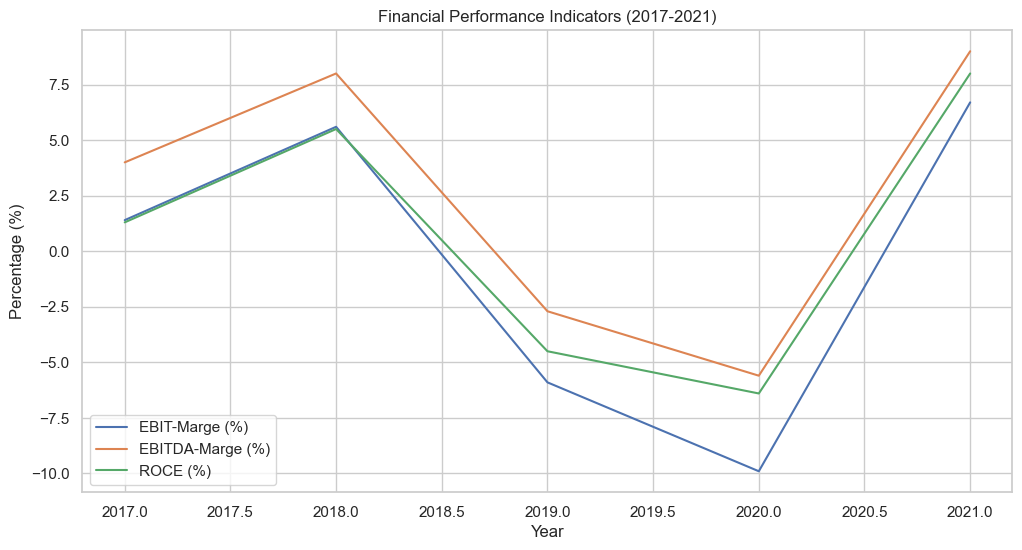

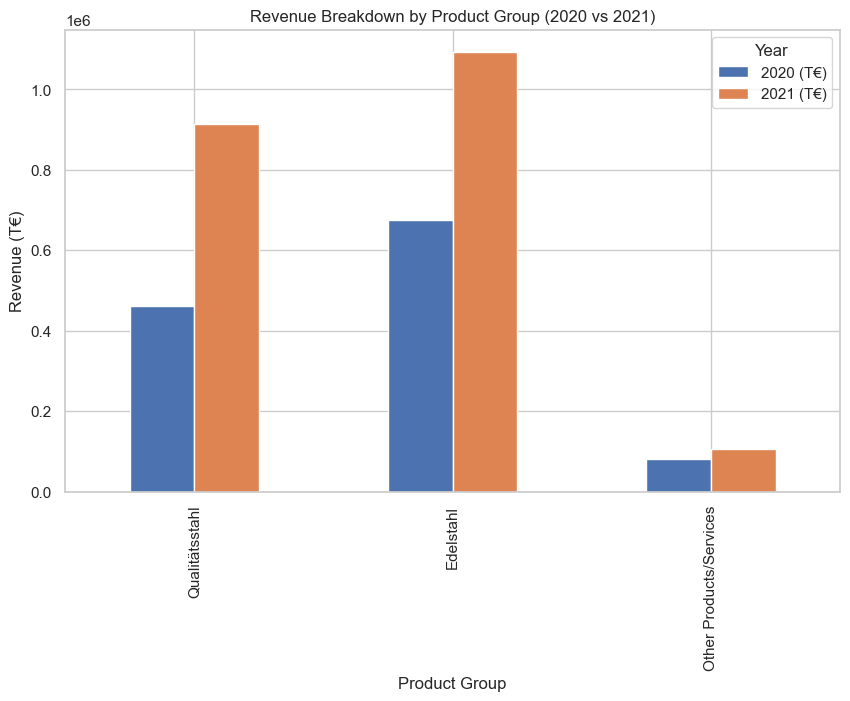

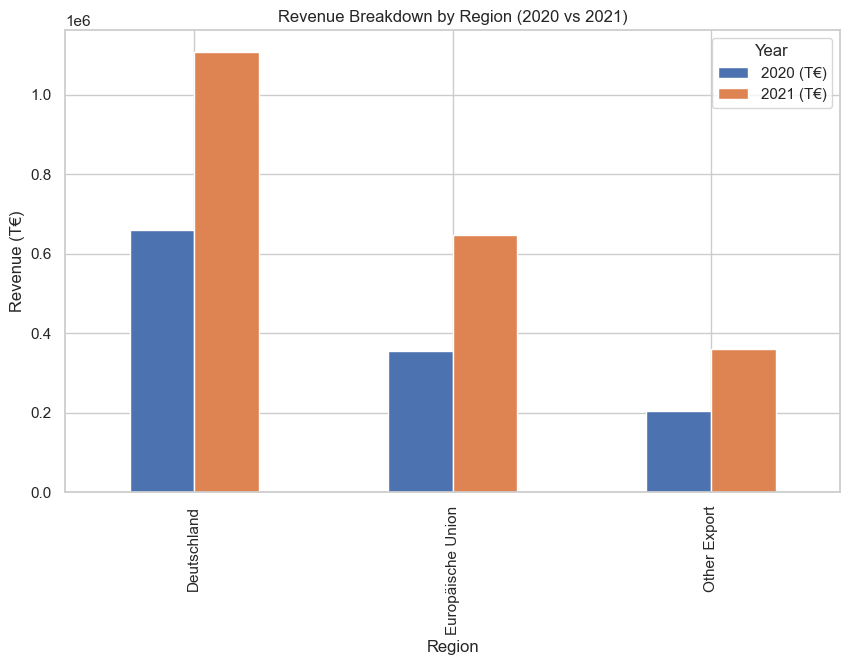

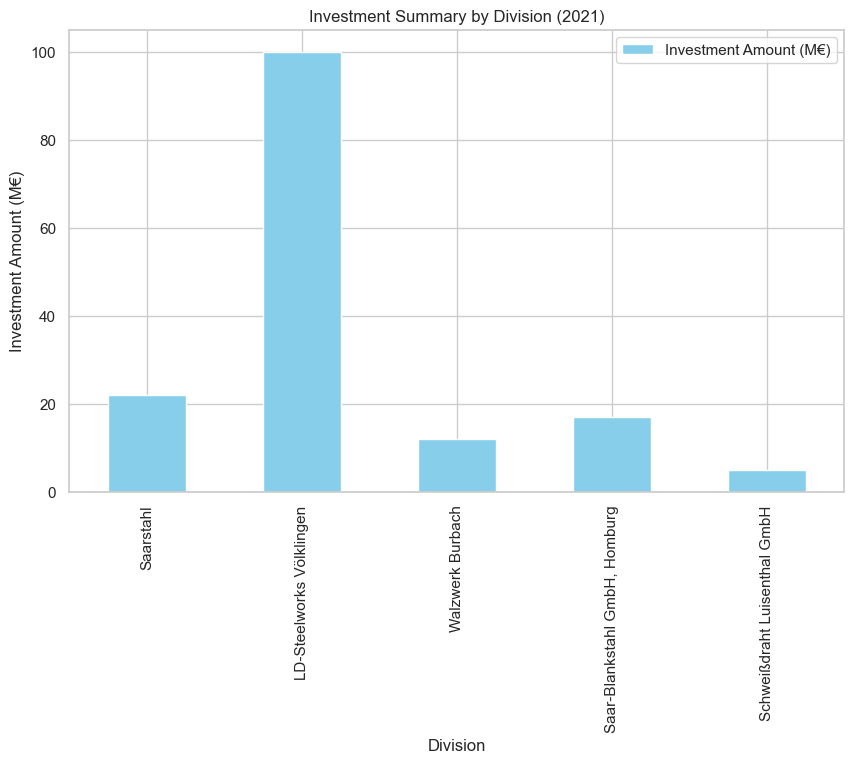

/var/folders/7x/3b2nn_f100s_ct_8rstgnvgc0000gn/T/ipykernel_52838/2123351636.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_analysis['Category'], y=sentiment_analysis['sentiment_value'], palette='coolwarm')


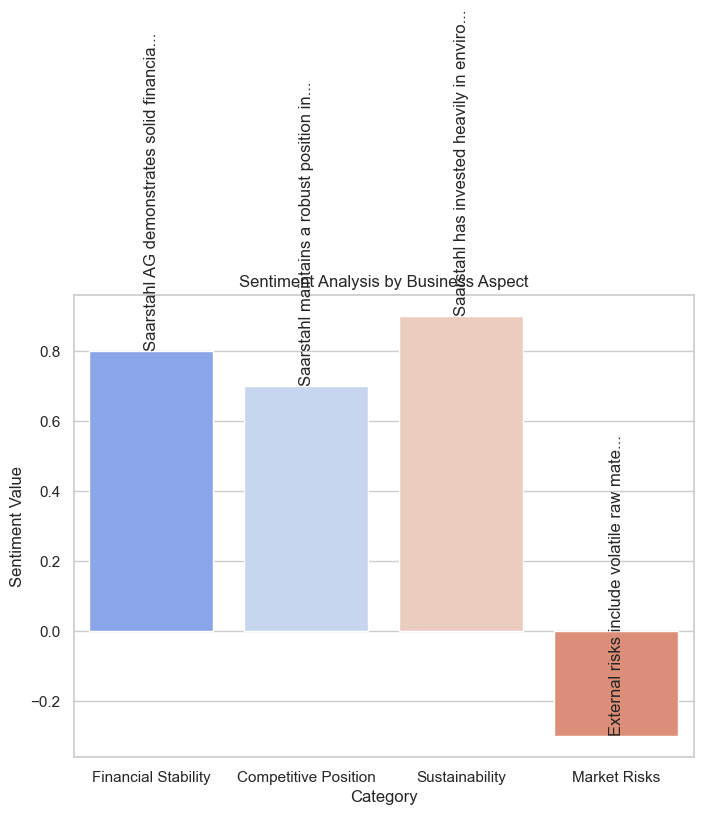

Key Financial Indicators Summary (2017-2021):
 Year  EBIT-Marge (%)  EBITDA-Marge (%)  ROCE (%)  Verschuldungsgrad (%)
 2017             1.4               4.0       1.3                   14.1
 2018             5.6               8.0       5.5                   11.7
 2019            -5.9              -2.7      -4.5                   15.4
 2020            -9.9              -5.6      -6.4                   17.1
 2021             6.7               9.0       8.0                   17.9


/var/folders/7x/3b2nn_f100s_ct_8rstgnvgc0000gn/T/ipykernel_52838/2123351636.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_analysis['Category'], y=sentiment_analysis['sentiment_value'], palette='coolwarm')


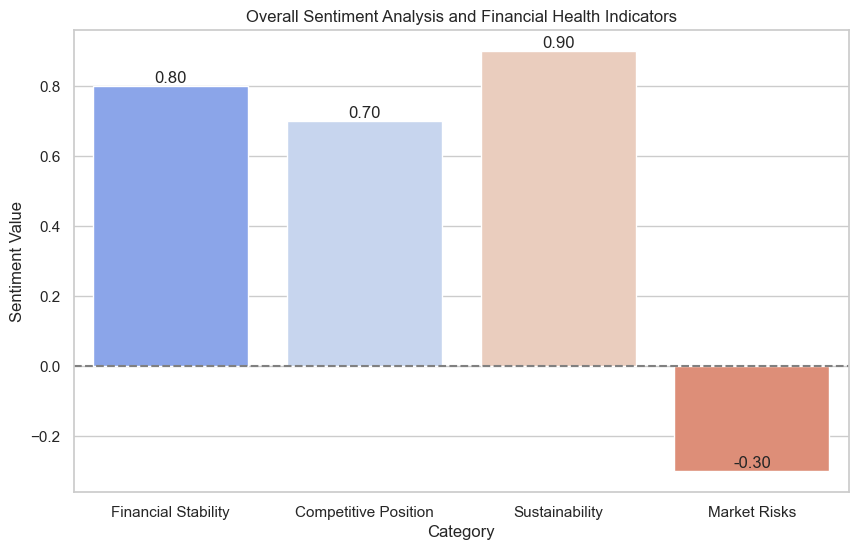

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `j_numbers` and `j_sentiment` data is loaded as per your initial data structure.

# Convert financial indicators and other tables into DataFrames
financial_indicators = pd.DataFrame(j_numbers['response'][0]['table_content'])
revenue_by_product = pd.DataFrame(j_numbers['response'][1]['table_content'])
revenue_by_region = pd.DataFrame(j_numbers['response'][2]['table_content'])
investment_summary = pd.DataFrame(j_numbers['response'][3]['table_content'])
sentiment_analysis = pd.DataFrame([x['table_content'] for x in j_sentiment['response']])

# Set up seaborn style for consistent visual style
sns.set(style="whitegrid")

# Financial Performance Indicators Over Time
plt.figure(figsize=(12, 6))
for column in ['EBIT-Marge (%)', 'EBITDA-Marge (%)', 'ROCE (%)']:
    sns.lineplot(x=financial_indicators['Year'], y=financial_indicators[column], label=column)
plt.title('Financial Performance Indicators (2017-2021)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend()
plt.show()

# Revenue Breakdown by Product Group
revenue_by_product.plot(x='Product Group', y=['2020 (T€)', '2021 (T€)'], kind='bar', figsize=(10, 6))
plt.title('Revenue Breakdown by Product Group (2020 vs 2021)')
plt.xlabel('Product Group')
plt.ylabel('Revenue (T€)')
plt.legend(title='Year')
plt.show()

# Revenue Breakdown by Region
revenue_by_region.plot(x='Region', y=['2020 (T€)', '2021 (T€)'], kind='bar', figsize=(10, 6))
plt.title('Revenue Breakdown by Region (2020 vs 2021)')
plt.xlabel('Region')
plt.ylabel('Revenue (T€)')
plt.legend(title='Year')
plt.show()

# Investment Summary by Division
investment_summary.plot(x='Division', y='Investment Amount (M€)', kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Investment Summary by Division (2021)')
plt.xlabel('Division')
plt.ylabel('Investment Amount (M€)')
plt.show()

# Sentiment Analysis Summary
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_analysis['Category'], y=sentiment_analysis['sentiment_value'], palette='coolwarm')
plt.title('Sentiment Analysis by Business Aspect')
plt.xlabel('Category')
plt.ylabel('Sentiment Value')
for i, row in sentiment_analysis.iterrows():
    plt.text(i, row['sentiment_value'], f"{row['sentiment_value_explanation'][:40]}...", ha='center', va='bottom', rotation=90)
plt.show()

# Summary Table for Key Financial Indicators (2017-2021)
summary_table = financial_indicators[['Year', 'EBIT-Marge (%)', 'EBITDA-Marge (%)', 'ROCE (%)', 'Verschuldungsgrad (%)']]
print("Key Financial Indicators Summary (2017-2021):")
print(summary_table.to_string(index=False))

# Consolidated Summary Figure for Final Insights
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_analysis['Category'], y=sentiment_analysis['sentiment_value'], palette='coolwarm')
plt.title('Overall Sentiment Analysis and Financial Health Indicators')
plt.xlabel('Category')
plt.ylabel('Sentiment Value')
for i, row in sentiment_analysis.iterrows():
    plt.text(i, row['sentiment_value'], f"{row['sentiment_value']:.2f}", ha='center', va='bottom')
plt.axhline(0, color='gray', linestyle='--')
plt.show()
